In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone, get_m_transitions
from inks import Neugebauer, InkGamut, CellNeugebauer, bucket_points, sort_buckets, get_metamers
from spectra import Spectra, Pigment, Illuminant

In [3]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [4]:
trichromat = Observer.trichromat()
tetrachromat = Observer.tetrachromat()

In [5]:
E = Illuminant.get("E")

In [6]:
d65 = Illuminant.get("D65")

In [7]:
tetrachromat_d65 = Observer.tetrachromat(illuminant=d65)
tetrachromat_E = Observer.tetrachromat(illuminant=E)

# Best Metamers

In [55]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

In [56]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut = InkGamut(cijk_neug, illuminant=d65)

In [57]:
iterations = {}
with open(f'011124.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Iter": continue
        
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        iterations[name] = spectra

In [ ]:
tetrachromat_d65.observe(cijk_gamut.get_spectra((0.05, 0.2, 0.55, 0.95)))

In [ ]:
tetrachromat_d65.observe(cijk_gamut.get_spectra((0.2, 0.95, 0.05, 0.65)))

In [ ]:
tetrachromat_d65.observe(iterations['05 20 55 95'])

In [ ]:
tetrachromat_d65.observe(iterations['20 95 05 65'])

# Ideal Ink Gamut

In [146]:
ideal_inks = []
for r in np.load("npy/optimal_pigments.npy"):
    ideal_inks.append(Spectra(wavelengths=wavelengths1, data=r))

In [147]:
ideal_gamut = InkGamut(ideal_inks, paper=cijk["0000"].interpolate_values(wavelengths1), illuminant=d65)

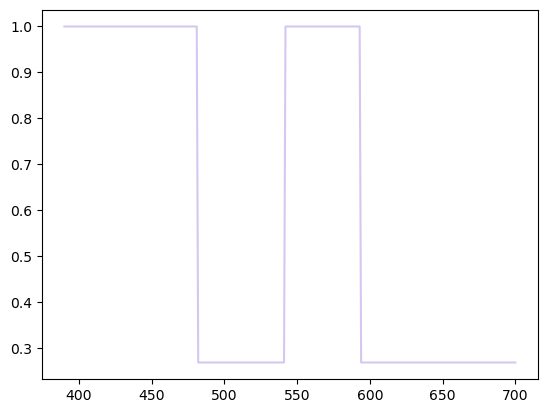

In [148]:
ideal_gamut.get_spectra((1,0,1,0)).plot()

In [149]:
ideal_gamut.get_width(tetrachromat_d65, stepsize=0.02, save="ideal_ink_gamut")

Generating Point Cloud: 100%|███████████| 6765201/6765201 [02:09<00:00, 52109.37it/s]


Point cloud generated.
Point cloud saved to ideal_ink_gamut_point_cloud2.
maximum distance is 0.1215407894917706 with percentages (0.0, 1.0, 0.0, 0.23999999999999999) and (0.97999999999999998, 0.0, 1.0, 0.20000000000000001)


0.12154078949177061

In [150]:
d65_data = d65.interpolate_values(wavelengths1).data()

In [151]:
d65_data.shape

(311,)

In [154]:
ideal_reflectance = []
for percentages in np.load("ideal_ink_gamut_percentages2.npy"):
    reflectance = ideal_gamut.neugebauer.mix(percentages)
    ideal_reflectance.append(reflectance.astype(np.float16))

In [155]:
np.save("ideal_ink_gamut_reflectance2.npy", ideal_reflectance)

In [161]:
len(ideal_reflectance)

6765201

In [ ]:
Spectra(wavelengths=wavelengths1,data=ideal_reflectance[31].T).plot()

In [ ]:
Spectra(wavelengths=wavelengths1,data=ideal_reflectance_illuminant[31].T).plot()

In [ ]:
tetrachromat_d65.wavelengths

# Transition function metamers

In [7]:
three_transitions1 = get_m_transitions(3, wavelengths1)

In [8]:
three_transitions1[0]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [9]:
for i, t in enumerate(three_transitions1):
    s1 = Spectra(data=three_transitions1[i], wavelengths=wavelengths1)
    s2 = Spectra(data=1-three_transitions1[i], wavelengths=wavelengths1)

    if np.all(np.abs(s1.to_rgb(illuminant=d65) - s2.to_rgb(illuminant=d65)) < 0.05):
        print(i)


KeyboardInterrupt



In [48]:
108/255

0.4235294117647059

In [47]:
Spectra(data=three_transitions10[0], wavelengths=wavelengths1).to_rgb()

array([ 1.        ,  0.97695361,  0.95880339])

In [58]:
def is_grey(rgb, threshold=0.05):
    grey_reference = np.array([0.45, 0.45, 0.45])
    return np.all(np.abs(rgb - grey_reference) < threshold)

In [51]:
lmsq_points = []
for transition in three_transitions10:
    lmsq = tetrachromat_d65.observe(transition)
    lmsq_points.append(lmsq)

In [52]:
transition_buckets = bucket_points(lmsq_points)

find a transition corresponding to grey, and use find_metamers

In [54]:
XYZ_to_LMS = np.array([
    [0.38,0.68,-0.07],
    [-0.229,1.18,0.046],
    [0,0,1]
])
XYZ_to_RGB = np.array([
        [3.2406, -1.5372, -0.4986],
        [-0.9689, 1.8758, 0.0415],
        [0.0557, -0.2040, 1.0570]
    ])

In [71]:
def max_distance(bucket,axis=2):
    axis_values = [metamer[0][axis] for metamer in bucket]

    min_val = min(axis_values)
    max_val = max(axis_values)

    distance = max_val - min_val

    min_index = axis_values.index(min_val)
    max_index = axis_values.index(max_val)
    best_indices = (bucket[min_index][1], bucket[max_index][1])

    return (distance, best_indices)

In [81]:
for SML in transition_buckets:
    xyz = np.matmul(np.linalg.inv(XYZ_to_LMS), np.flip(SML) / 100)
    rgb = np.matmul(XYZ_to_RGB, xyz)
#     print(rgb)
    if is_grey(rgb):
        distance, (i,j)=max_distance(transition_buckets[SML])
        if distance > 0.1:
            print(SML, distance, (i,j))

(45, 48, 45) 0.129477606425 (5001996, 4632275)
(45, 47, 44) 0.123753511188 (5002000, 4632271)
(45, 49, 47) 0.124161366697 (5002314, 4632279)
(45, 48, 46) 0.124419184949 (5001992, 4632605)
(48, 46, 43) 0.123719770442 (4880314, 4757597)
(48, 47, 44) 0.126647992414 (4880642, 4757599)
(48, 47, 45) 0.129144544257 (4880638, 4757929)
(48, 48, 45) 0.127028521634 (4880964, 4757603)
(48, 48, 46) 0.129144544257 (4880962, 4757605)
(48, 49, 47) 0.125793900675 (4880958, 4757607)
(52, 48, 46) 0.133616805984 (4757628, 4880613)
(52, 47, 45) 0.129144544257 (4757630, 4880937)
(52, 47, 44) 0.128414298077 (4757634, 4880279)
(48, 46, 44) 0.124344668804 (4880312, 4757925)
(52, 49, 46) 0.126770703381 (4758278, 4880285)
(52, 48, 45) 0.121817329028 (4757956, 4880281)
(48, 44, 42) 0.128093471132 (4879656, 4758567)
(48, 45, 43) 0.128785148249 (4879986, 4758247)
(48, 42, 40) 0.123431069759 (4879328, 4758561)
(48, 43, 41) 0.122369375895 (4879660, 4758563)
(48, 44, 43) 0.125410878161 (4879652, 4758569)
(48, 41, 39) 

In [130]:
get_metamers(lmsq_points, (0.44, 0.47, 0.39, 0.45), threshold=1e-2)

[(0.12960454964602264, 4632929),
 (0.12907334522943226, 4569677),
 (0.12494080994256629, 4632601),
 (0.0051853646965774325, 5001668),
 (0.004806340534212028, 5001996),
 (0.0010040436934528607, 5001340),
 (0.00017835365619778276, 5001670),
 (0.00011181289876399658, 5001998)]

In [122]:
tetrachromat_d65.observe(Spectra(data=three_transitions10[5001996], wavelengths=wavelengths1))

array([ 0.44509279,  0.47652711,  0.39480634,  0.44869471])

In [141]:
grey1 = Spectra(data=three_transitions10[4880638], wavelengths=wavelengths1)
grey2 = Spectra(data=1 - three_transitions10[4880638], wavelengths=wavelengths1)

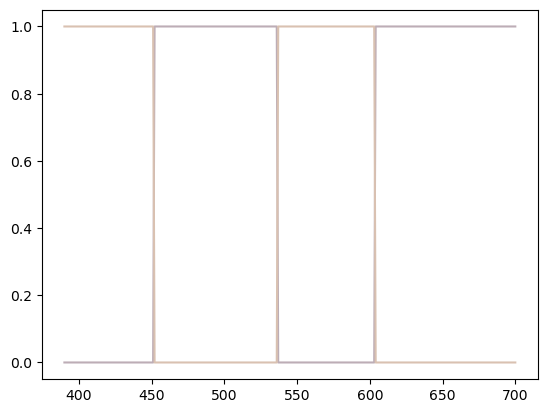

In [142]:
grey1.plot()
# (*grey1).plot()
grey2.plot()

In [143]:
tetrachromat_d65.observe(grey1)

array([ 0.47936564,  0.47066492,  0.39163181,  0.44813225])

In [144]:
tetrachromat_d65.observe(grey2)

array([ 0.52063436,  0.52933508,  0.60836819,  0.55186775])

In [46]:
def compare_transitions(indices):
    
    arr = np.zeros_like(wavelengths1, dtype=int)
    for lmbda in indices:
        index = lmbda - wavelengths1[0]
        arr[index:] = 1 - arr[index]
    met1 = Spectra(wavelengths=wavelengths1, data=arr)
    met2 = Spectra(wavelengths=wavelengths1, data=1-arr)
    met1.plot()
    met2.plot()
    print(tetrachromat_d65.observe(met1))
    print(tetrachromat_d65.observe(met2))

    print(met1.to_rgb())
    print(met2.to_rgb())
    print(np.linalg.norm(met1.to_rgb() - met2.to_rgb()))


In [145]:
for w in wavelengths1:
    print(w)

390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639


In [144]:
arr = np.zeros_like(wavelengths1, dtype=int)
for lmbda in [451, 539, 599]:
    index = lmbda - wavelengths1[0]
    arr[index:] = 1 - arr[index]
    
for a in 1-arr:
    print(a)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_square(color):
    fig, ax = plt.subplots()
    square = patches.Rectangle((0.1, 0.1), 0.8, 0.8, color=color)
    ax.add_patch(square)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.show()

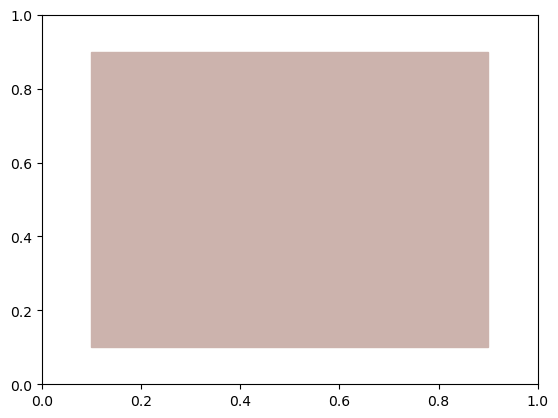

In [44]:
plot_square((0.8, 0.7, 0.68))

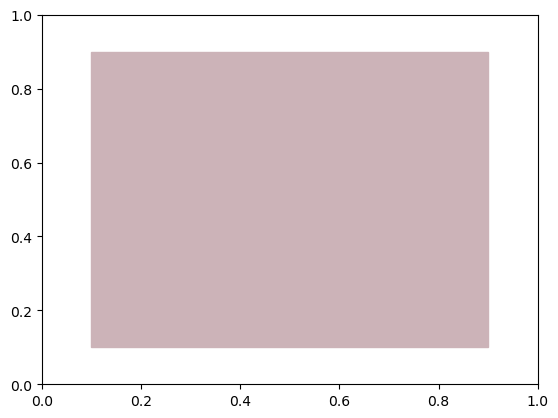

In [43]:
plot_square((0.8, 0.7, 0.72))

[ 0.4973042   0.50799827  0.4379545   0.49730383]
[ 0.5026958   0.49200173  0.5620455   0.50269617]
[ 0.80783961  0.70039854  0.72360475]
[ 0.79035381  0.73522244  0.68490964]
0.054916018806


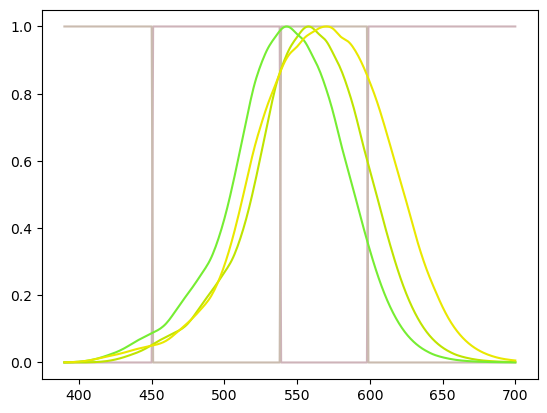

In [142]:
indices = [451, 539, 599]
compare_transitions(indices)
Cone.q_cone().plot()
Cone.m_cone().plot()
Cone.l_cone().plot()

[ 0.51041815  0.48291614  0.5211906   0.58941925]
[ 0.48958185  0.51708386  0.4788094   0.41058075]
[ 1.          0.63516924  0.72837188]
[ 0.          0.79011133  0.67974267]
1.01310011908


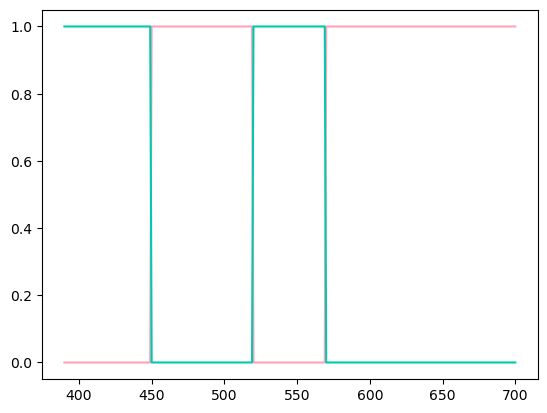

In [70]:
indices = [450, 520, 560]
compare_transitions(indices)

# Simulated and Measured Ink Gamut

In [156]:
cpvy = {}
with open(f'cypv.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cpvy[name] = spectra

In [157]:
def get_reflectances(percentages, gamut: InkGamut):
    reflectances = []
    for percentage in percentages:
        reflectance = gamut.neugebauer.mix(percentage)
        reflectances.append(reflectance.astype(np.float16))
    return reflectances

In [167]:
simulated_gamut = InkGamut(
[
    cpvy["1000"],
    cpvy["0100"],
    cpvy["0010"],
    cpvy["0001"]

], paper=cpvy["0000"],
    illuminant=d65)

In [168]:
simulated_gamut.get_width(tetrachromat_d65, stepsize=0.02, save="simulated_ink_gamut")

Generating Point Cloud: 100%|███████████| 6765201/6765201 [01:35<00:00, 71121.34it/s]


Point cloud generated.
Point cloud saved to simulated_ink_gamut_point_cloud2.
maximum distance is 0.03269373915302354 with percentages (0.0, 0.0, 0.59999999999999998, 0.57999999999999996) and (0.44, 0.76000000000000001, 0.0, 0.02)


0.032693739153023538

In [169]:
simulated_reflectances = get_reflectances(np.load("simulated_ink_gamut_percentages2.npy"), simulated_gamut)
np.save("simulated_ink_gamut_reflectances2", simulated_reflectances)

In [165]:
simulated_reflectances[0].shape

(1, 31)

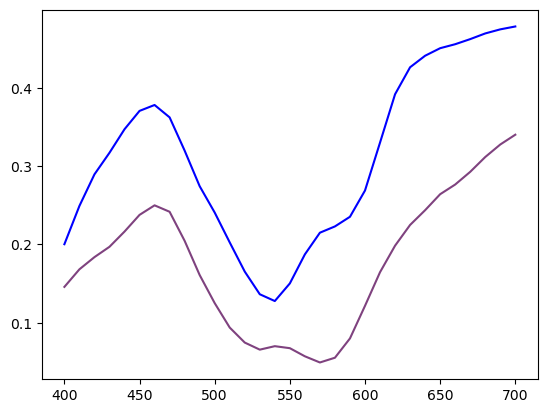

In [44]:
s = "1110"
simulated_gamut.get_spectra(tuple(int(c) for c in s)).plot(color='blue')
cpvy[s].plot()

In [172]:
measured_gamut = InkGamut(Neugebauer(cpvy), illuminant=d65)

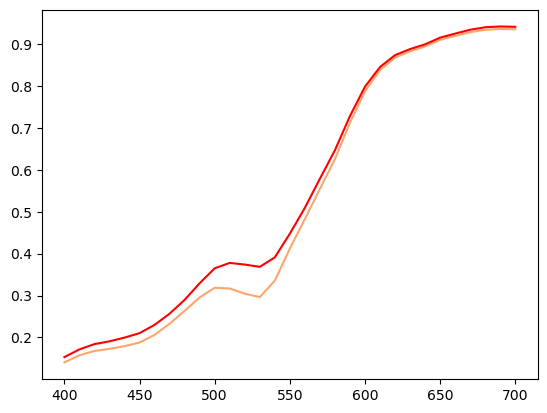

In [183]:
measured_gamut.get_spectra((0,0.3,0, 0.6)).plot()
simulated_gamut.get_spectra((0, 0.3,0,.6)).plot(color='red')

In [173]:
measured_gamut.get_width(tetrachromat_d65, stepsize=0.02, save="measured_ink_gamut")

Generating Point Cloud: 100%|███████████| 6765201/6765201 [01:35<00:00, 70746.66it/s]


Point cloud generated.
Point cloud saved to measured_ink_gamut_point_cloud2.
maximum distance is 0.03561888235549973 with percentages (0.059999999999999998, 0.0, 0.5, 0.80000000000000004) and (0.32000000000000001, 1.0, 0.040000000000000001, 0.040000000000000001)


0.035618882355499731

In [185]:
measured_reflectances = get_reflectances(np.load("measured_ink_gamut_percentages2.npy"), measured_gamut)
np.save("measured_ink_gamut_reflectances2", measured_reflectances)

# saq and mal

In [25]:
def excel_as_np(s):
    return np.array([float(a) for a in s.split("\n")])

In [26]:
m0101_data = excel_as_np("""0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00""")

In [27]:
m1010_data = excel_as_np("""1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
1.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00
0.00E+00""")

In [28]:
wavelengths2 = np.arange(390,701,2)

In [32]:
m0101 = Spectra(wavelengths=wavelengths2, data=m0101_data).interpolate_values(wavelengths1)

In [36]:
m1010 = Spectra(wavelengths=wavelengths2, data=m1010_data).interpolate_values(wavelengths1)

In [39]:
m1010.to_rgb(illuminant=E)

array([ 0.63176667,  0.71953787,  0.97770398])

In [38]:
m0101.to_rgb(illuminant=E)

array([ 0.8224879 ,  0.75097488,  0.24305222])

In [40]:
m1010.to_rgb(illuminant=d65)

array([ 0.67904177,  0.70532772,  0.97825643])

In [41]:
m0101.to_rgb(illuminant=d65)

array([ 0.78636211,  0.76401253,  0.24245689])

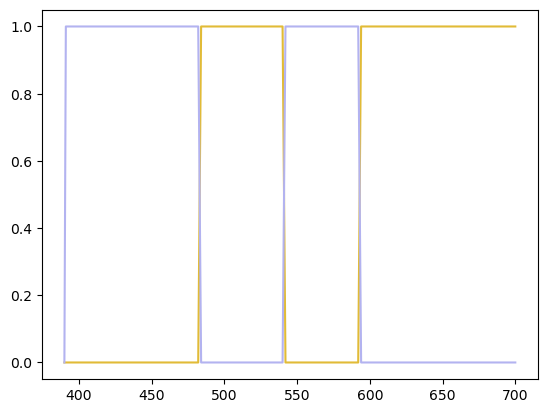

In [37]:
m0101.plot()
m1010.plot()
m1010.to_rgb(illuminant=E)

# $\Delta Q$ vs $\Delta L$

first, familiar $\Delta Q$

In [71]:
tetra_obs = np.load("tetra-points.npy")

In [73]:
tetra_obs[23102]

array([ 0.45192084,  0.59649538,  0.52542142,  0.57464243])

In [74]:
tetra_obs[2087]

array([ 0.45101063,  0.59731611,  0.64562248,  0.56426189])

In [72]:
sort_buckets(bucket_points(tetra_obs))

[(0.12020106615221227, (23102, 2087)),
 (0.11933847410284559, (47072, 4403)),
 (0.11853178707143541, (28794, 4093)),
 (0.11709328761803184, (60706, 9533)),
 (0.11653329744183472, (19874, 5927)),
 (0.11594818394600104, (11228, 53125)),
 (0.115926814242297, (49436, 53469)),
 (0.11391495560257703, (31372, 39501)),
 (0.11391495560257692, (69256, 25521)),
 (0.11236951179306076, (63392, 54425)),
 (0.11236951179306037, (57218, 5173)),
 (0.11175196839129065, (30158, 65185)),
 (0.11115358397738984, (4914, 7175)),
 (0.11115358397738972, (60794, 12259)),
 (0.11115358397738956, (27810, 54297)),
 (0.1111535839773895, (44076, 7605)),
 (0.11070023271228391, (31464, 8877)),
 (0.11070023271228352, (25318, 22093)),
 (0.10948430489661287, (25058, 27513)),
 (0.10948430489661276, (12572, 7877)),
 (0.10925525776287681, (39330, 25395)),
 (0.10651113728642025, (34320, 55455)),
 (0.10438145699247367, (7208, 52539)),
 (0.10264093858760023, (17676, 10271)),
 (0.1015190431233341, (71804, 12483)),
 (0.100506032936

ok so we're claiming Q only gets as wide as 0.12, so our total would be 3.5/12, which is a bit high imo

In [88]:
3.56 /12

0.2966666666666667

ok next $\Delta L$

In [77]:
tri_obs = np.load("tri-points.npy")

In [80]:
sort_buckets(bucket_points(tri_obs))

[(0.34925843210940022, (225, 200)),
 (0.33327907967785664, (733, 504)),
 (0.33038283852631278, (1945, 408)),
 (0.29832811924284197, (1659, 2032)),
 (0.29832811924284186, (823, 1736)),
 (0.29648330978679682, (49, 548)),
 (0.29583065571122691, (2421, 2352)),
 (0.2958306557112268, (2469, 48)),
 (0.2958306557112268, (27, 1386)),
 (0.29583065571122663, (3377, 302)),
 (0.27843718416846408, (2091, 2694)),
 (0.27843718416846391, (2033, 2158)),
 (0.27677181796600753, (2707, 786)),
 (0.27677181796600753, (2571, 1724)),
 (0.27677181796600747, (2951, 1332)),
 (0.26754418666376611, (2831, 2570)),
 (0.26532696375389619, (2943, 2138)),
 (0.25783005680301641, (2867, 2110)),
 (0.25762508796698386, (1759, 3212)),
 (0.25559961147382337, (2493, 1798)),
 (0.25559961147382315, (2449, 2950)),
 (0.25559961147382315, (2251, 2022)),
 (0.25559961147382315, (2219, 3162)),
 (0.25196034283183355, (418, 3222)),
 (0.25196034283183349, (1030, 1174)),
 (0.2474203339583082, (1382, 3152)),
 (0.24742033395830798, (1941, 1

ok now we have to do some cmy gamut stuff 

In [81]:
cmy_primaries_dict = {}
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra

In [83]:
cmy_gamut = InkGamut(Neugebauer(cmy_primaries_dict), illuminant=d65)

In [84]:
cmy_gamut.get_width(trichromat, stepsize=0.05)

Generating Point Cloud: 100%|█████████████████| 9261/9261 [00:00<00:00, 68044.10it/s]

Point cloud generated.
maximum distance is 0.15468951396926872 with percentages (0.90000000000000002, 0.050000000000000003, 0.20000000000000001) and (0.0, 0.75, 0.050000000000000003)


0.15468951396926872

In [86]:
0.154/0.349

0.44126074498567336

In [90]:
mal_data = excel_as_np("""8.22E-02
8.48E-02
8.03E-02
7.73E-02
7.94E-02
8.49E-02
9.78E-02
1.20E-01
1.46E-01
1.65E-01
1.59E-01
1.24E-01
8.85E-02
6.55E-02
6.32E-02
5.95E-02
5.01E-02
4.43E-02
5.19E-02
8.56E-02
1.81E-01
3.59E-01
5.65E-01
7.20E-01
8.25E-01
8.87E-01
8.88E-01
8.96E-01
8.99E-01
9.00E-01
8.99E-01""")

In [92]:
mal = Spectra(wavelengths=wavelengths10, data=mal_data)

In [94]:
mal.to_rgb()

array([ 0.78175042,  0.2245274 ,  0.32801871])

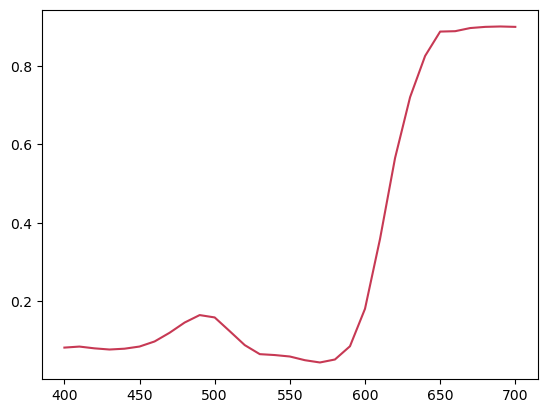

In [93]:
mal.plot()

In [95]:
blue_data=excel_as_np("""1.46E-01
1.68E-01
1.84E-01
1.97E-01
2.16E-01
2.38E-01
2.50E-01
2.42E-01
2.05E-01
1.61E-01
1.25E-01
9.39E-02
7.47E-02
6.57E-02
7.01E-02
6.76E-02
5.72E-02
4.93E-02
5.54E-02
8.00E-02
1.22E-01
1.65E-01
1.98E-01
2.25E-01
2.44E-01
2.64E-01
2.76E-01
2.93E-01
3.12E-01
3.27E-01
3.40E-01""")

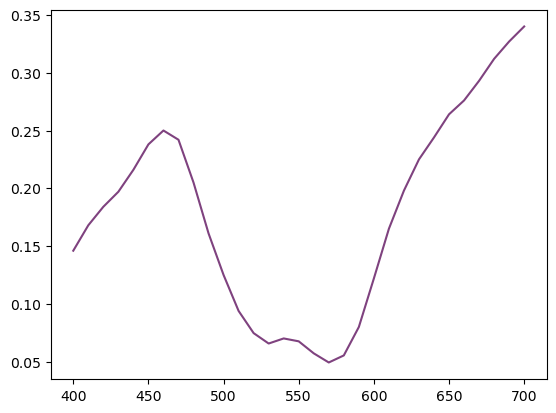

In [96]:
Spectra(wavelengths=wavelengths10, data=blue_data).plot()